In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-clustering/__results__.html
/kaggle/input/customer-segmentation-clustering/__resultx__.html
/kaggle/input/customer-segmentation-clustering/__notebook__.ipynb
/kaggle/input/customer-segmentation-clustering/__output__.json
/kaggle/input/customer-segmentation-clustering/custom.css
/kaggle/input/customer-segmentation-clustering/__results___files/__results___55_3.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___55_1.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___39_0.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___53_5.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___55_13.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___53_7.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___53_1.png
/kaggle/input/customer-segmentation-clustering/__results___files/__results___55_7.

Current Working Directory: /kaggle/working


Error downloading dataset: HTTP Error 404: Not Found
Creating a synthetic Mall Customers dataset for demonstration...
Synthetic dataset created and saved

Dataset Information:
Shape of the dataset: (200, 5)

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      69
1           2  Female   56                  22                       4
2           3    Male   66                  41                      16
3           4    Male   69                  41                      24
4           5    Male   49                 112                      80

Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Dataset summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   

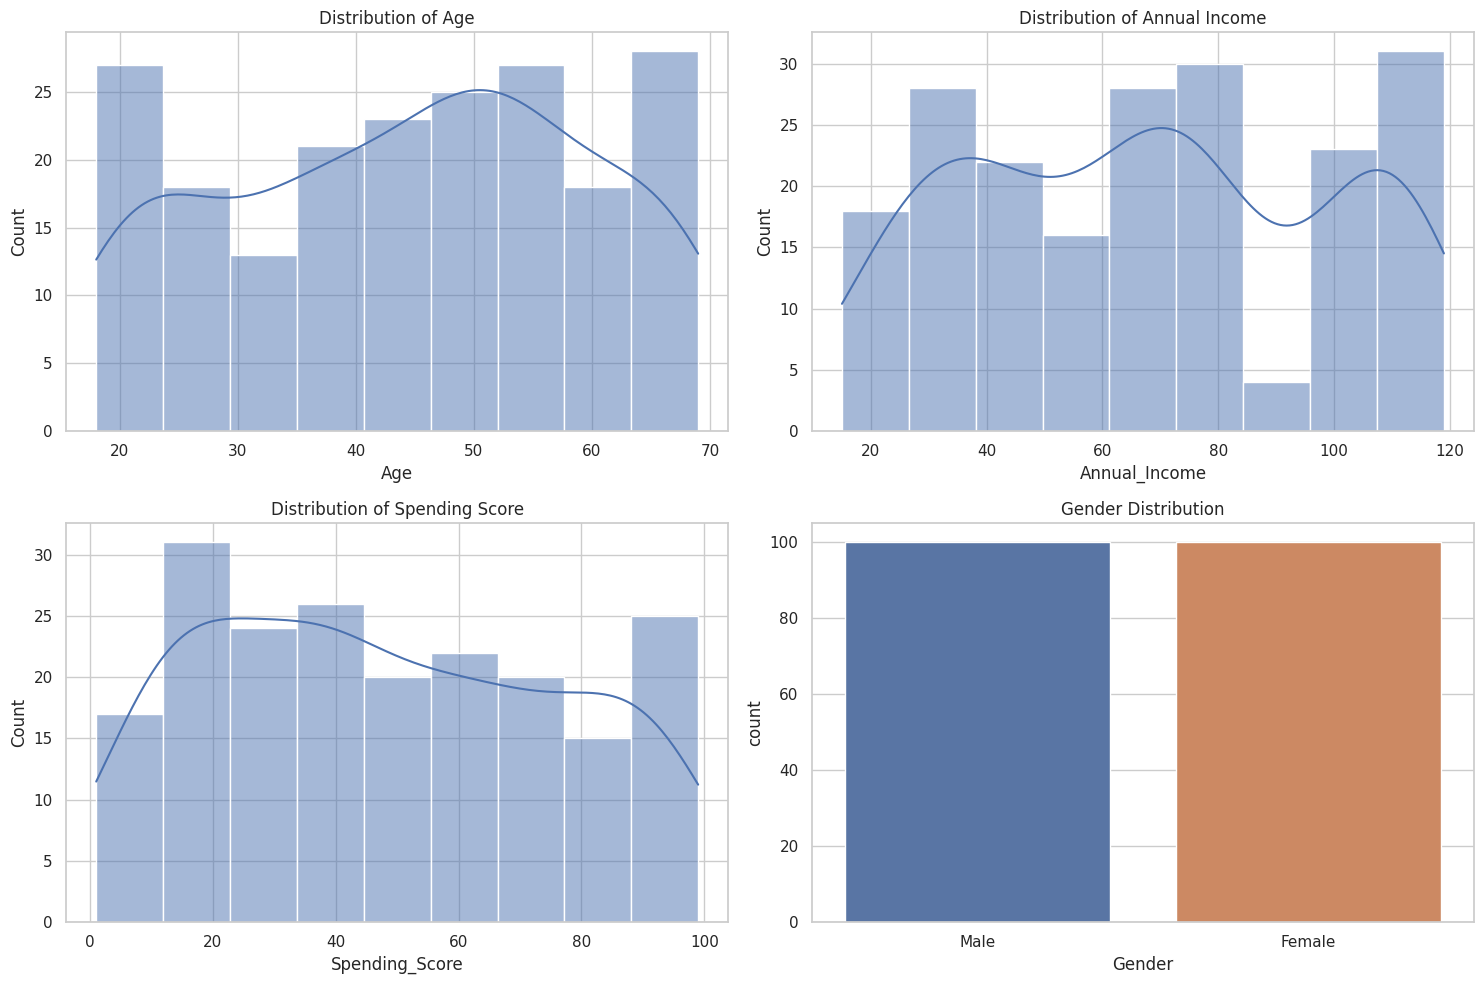

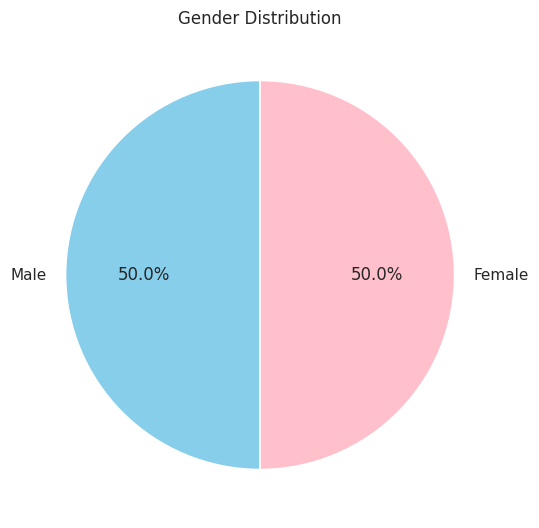

For n_clusters = 2, the silhouette score is 0.264
For n_clusters = 3, the silhouette score is 0.273
For n_clusters = 4, the silhouette score is 0.295
For n_clusters = 5, the silhouette score is 0.313
For n_clusters = 6, the silhouette score is 0.325
For n_clusters = 7, the silhouette score is 0.325
For n_clusters = 8, the silhouette score is 0.326
For n_clusters = 9, the silhouette score is 0.320
For n_clusters = 10, the silhouette score is 0.317


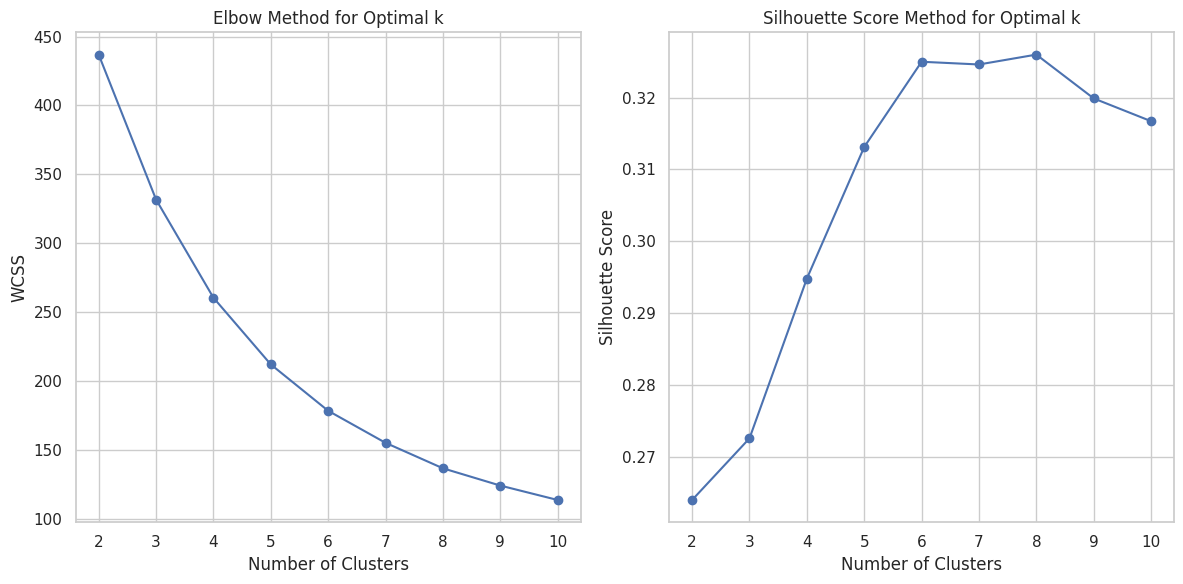

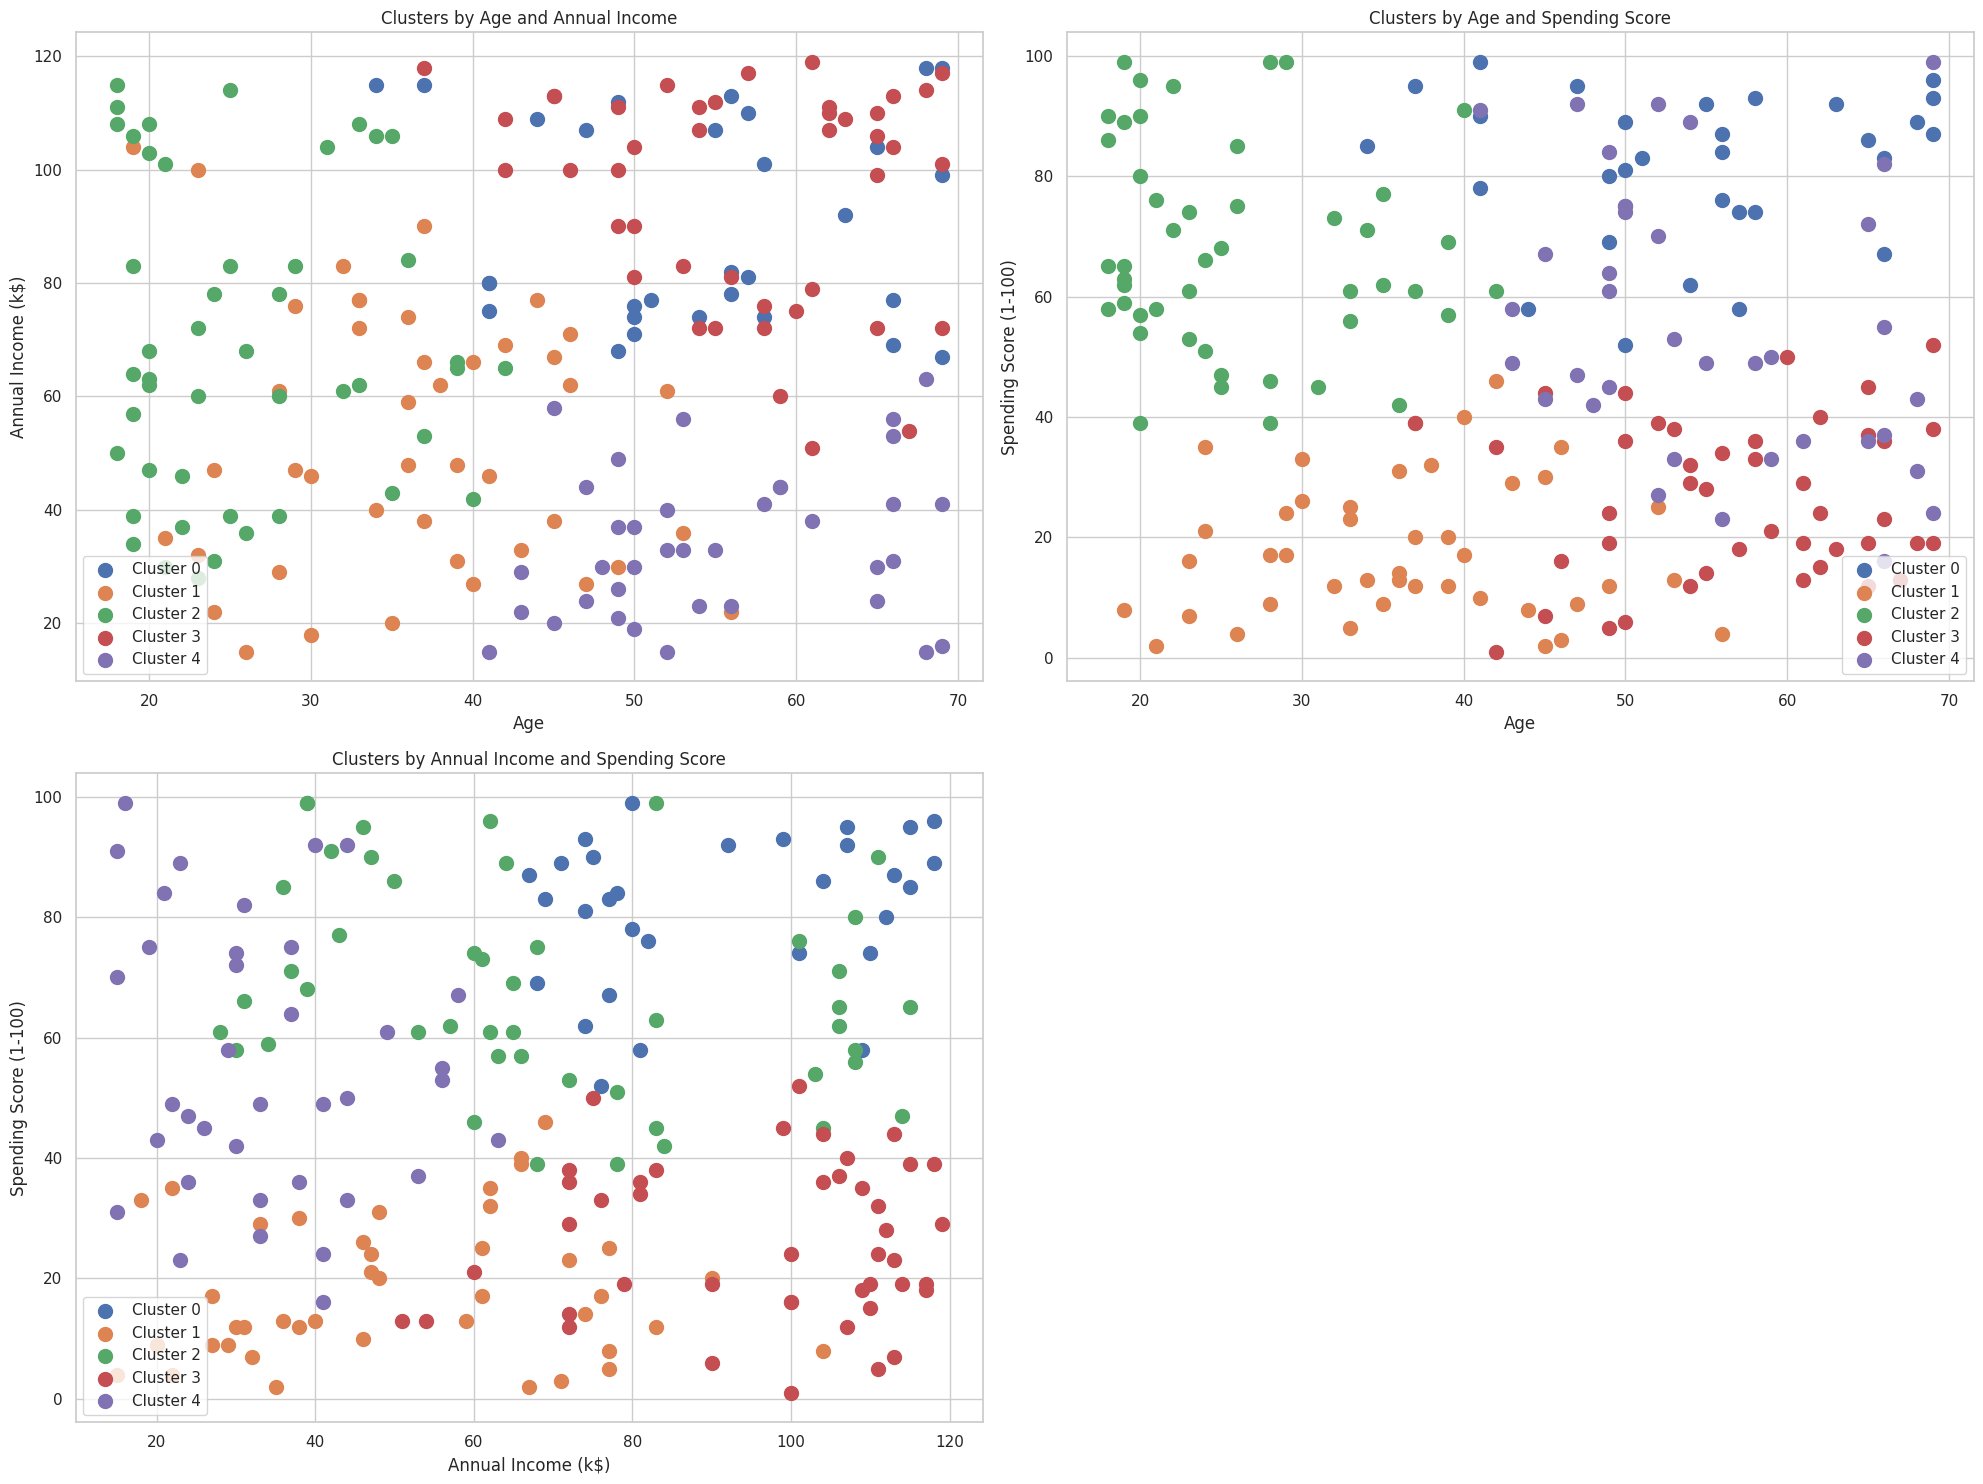

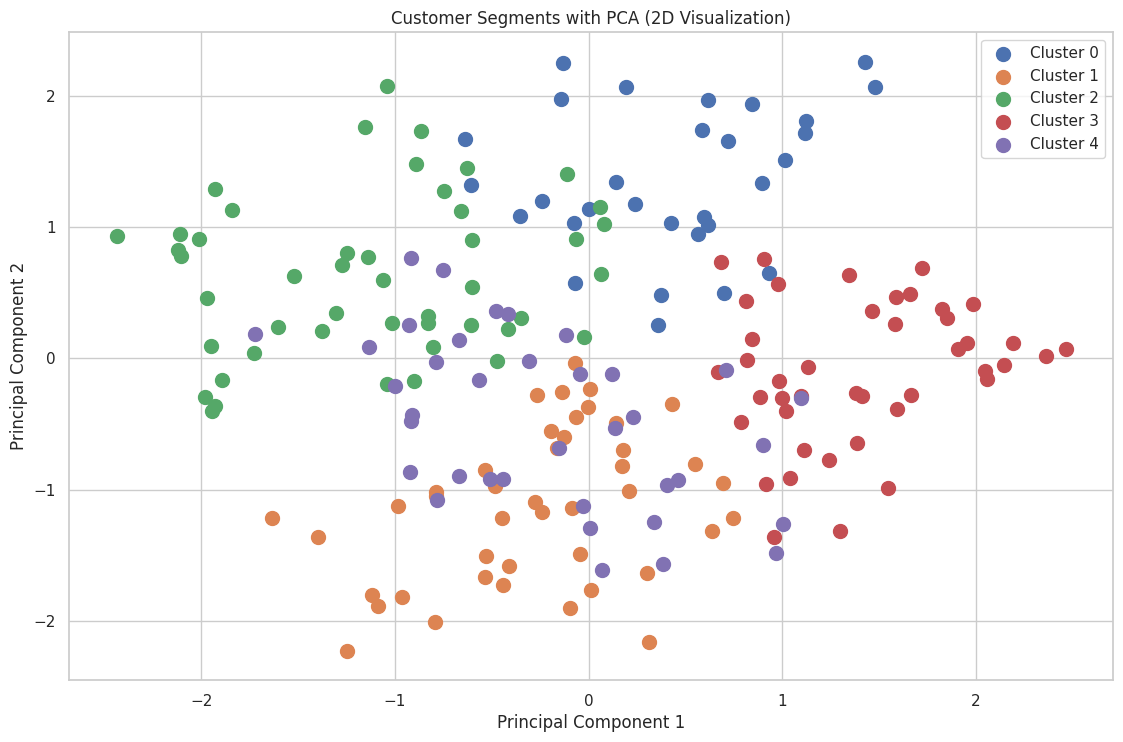


Explained variance by principal components: [0.37769033 0.33928268]
Total explained variance: 0.72

Cluster Statistics:
               Age  Annual_Income  Spending_Score
Cluster                                          
0        54.200000      90.766667       81.566667
1        36.232558      52.302326       18.186047
2        25.851064      69.489362       67.787234
3        56.860465      96.046512       26.302326
4        55.054054      33.891892       55.837838

Gender Distribution by Cluster (%):
Gender      Female       Male
Cluster                      
0        46.666667  53.333333
1        53.488372  46.511628
2        42.553191  57.446809
3        48.837209  51.162791
4        59.459459  40.540541

===== Customer Segment Descriptions =====

Cluster 0 - 30 customers (15.0% of total):
  Average Age: 54.2 years
  Average Annual Income: $90.8k
  Average Spending Score: 81.6/100
  Gender Distribution: {'Male': 53.333333333333336, 'Female': 46.666666666666664}
  Customer Type: HIG

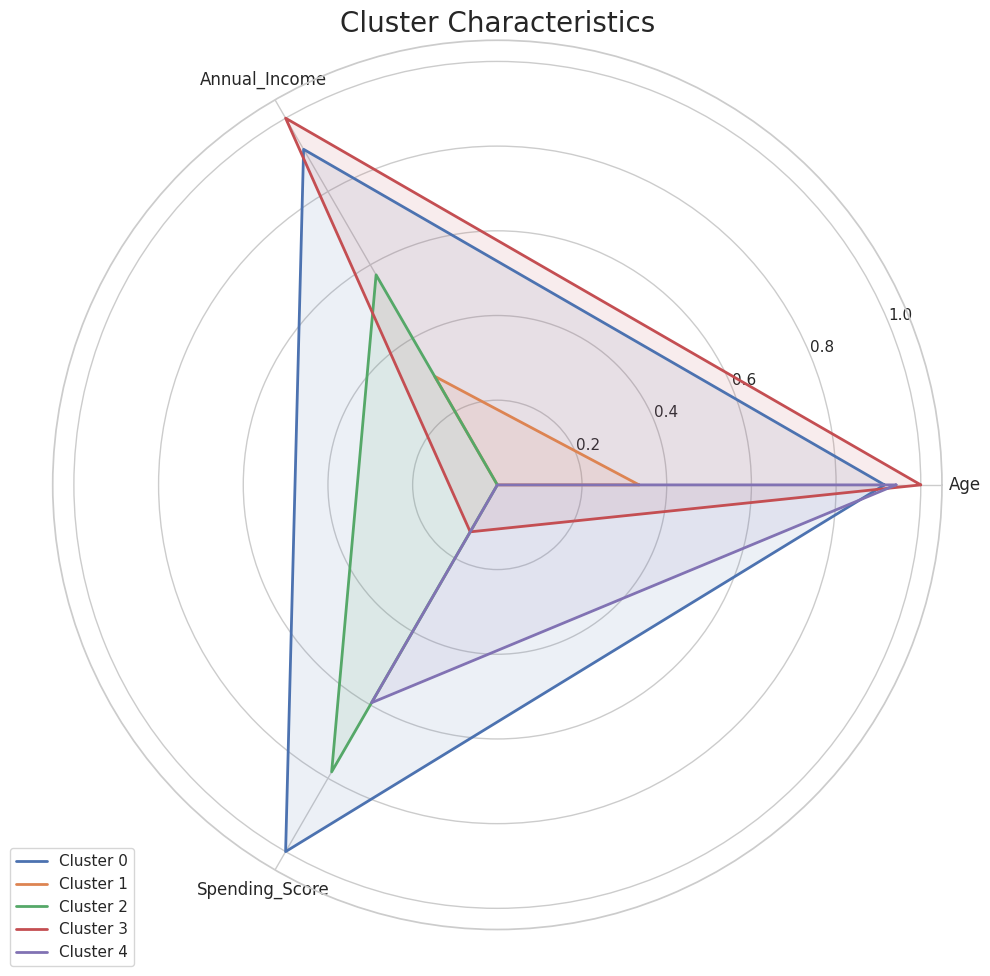

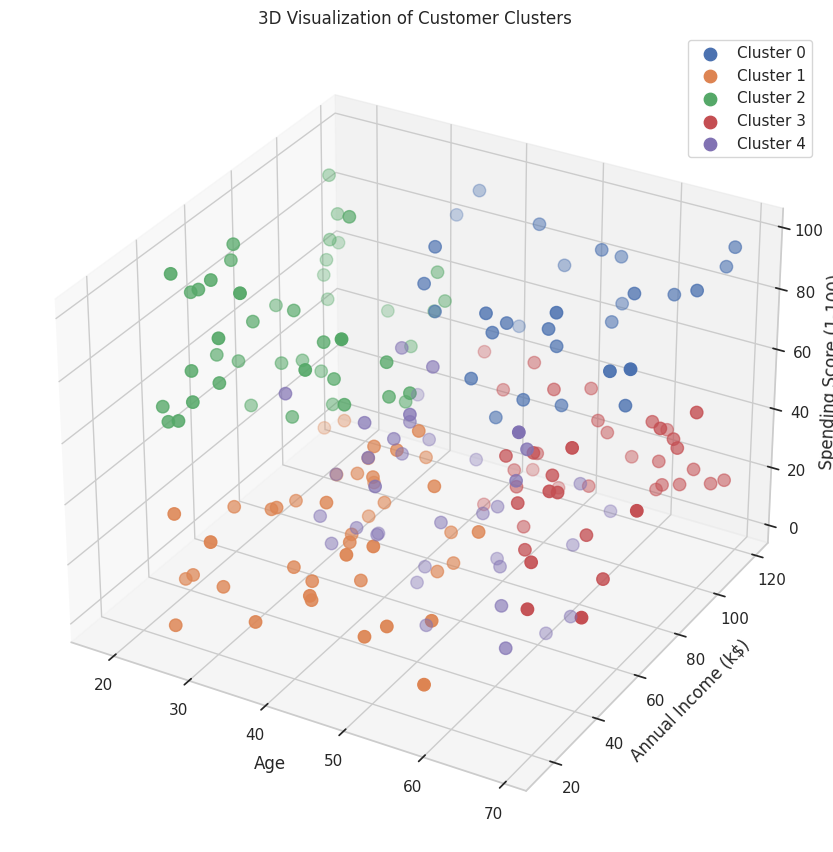


Cluster Centers (Original Scale):
               Age  Annual_Income  Spending_Score
Cluster                                          
0        54.200000      90.766667       81.566667
1        36.232558      52.302326       18.186047
2        25.851064      69.489362       67.787234
3        56.860465      96.046512       26.302326
4        55.054054      33.891892       55.837838


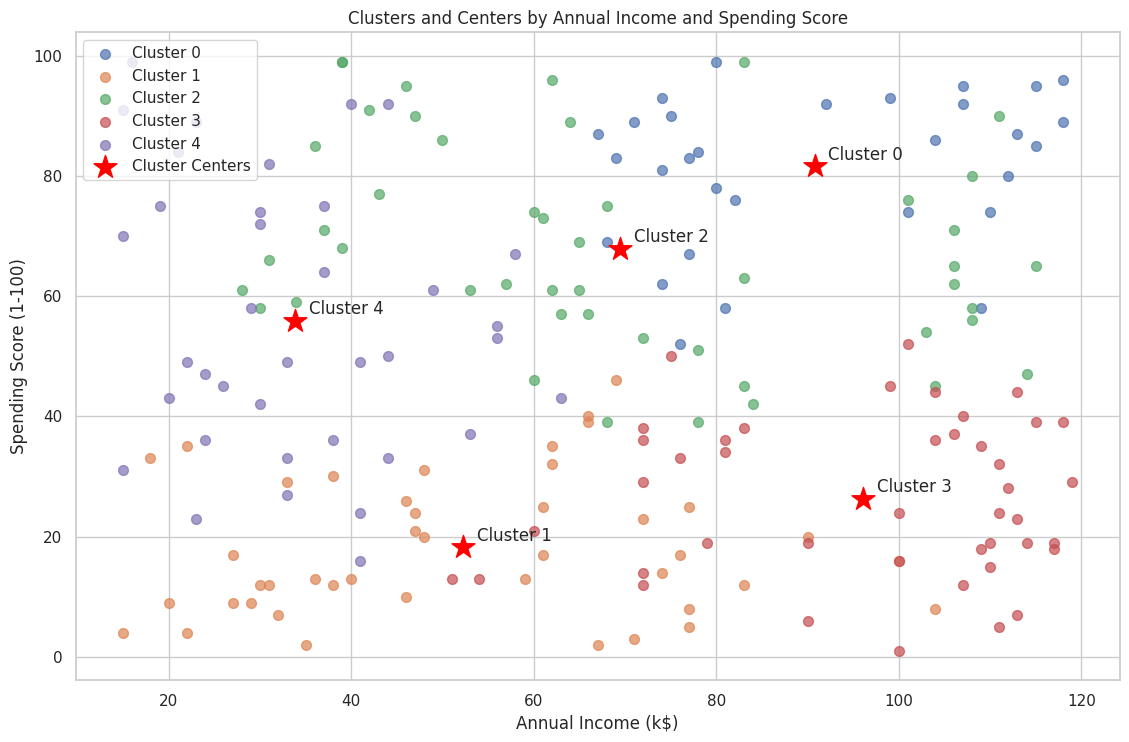


===== Business Recommendations Based on Customer Segments =====

1. For HIGH VALUE customers:
   - Implement premium loyalty programs with exclusive benefits
   - Offer early access to new products and premium services
   - Focus on customer retention through personalized experiences

2. For POTENTIAL customers:
   - Create targeted campaigns to increase their spending
   - Provide special promotions on premium products
   - Use data-driven recommendations to increase conversion rates

3. For LOYAL customers:
   - Reward their high spending with loyalty points and discounts
   - Cross-sell and upsell complementary products
   - Create referral programs to leverage their positive attitude

4. For AVERAGE customers:
   - Develop engagement strategies to increase visit frequency
   - Provide value-based promotions to boost spending
   - Use gamification to increase their engagement with the brand

5. For BUDGET customers:
   - Offer affordable product lines and value packages
   - Create

In [2]:
# Customer Segmentation for Retail Business
# Using Mall Customers Dataset

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Display information about the current working directory
print("Current Working Directory:", os.getcwd())

# Download the Mall Customers Dataset
try:
    print("\nDownloading Mall Customers Dataset...")
    url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Clustering/Mall_Customers.csv"
    df = pd.read_csv(url)
    print("Dataset downloaded successfully")
    
    # Save to working directory for future use
    df.to_csv('Mall_Customers.csv', index=False)
    print("Dataset saved to working directory")
except Exception as e:
    print(f"\nError downloading dataset: {e}")
    print("Creating a synthetic Mall Customers dataset for demonstration...")
    
    np.random.seed(42)
    n_samples = 200
    
    # Create synthetic data
    gender = np.random.choice(['Male', 'Female'], size=n_samples)
    age = np.random.randint(18, 70, size=n_samples)
    annual_income = np.random.randint(15, 120, size=n_samples)
    spending_score = np.random.randint(1, 100, size=n_samples)
    
    # Create dataframe
    df = pd.DataFrame({
        'CustomerID': range(1, n_samples + 1),
        'Gender': gender,
        'Age': age,
        'Annual Income (k$)': annual_income,
        'Spending Score (1-100)': spending_score
    })
    
    # Save synthetic dataset
    df.to_csv('Mall_Customers_synthetic.csv', index=False)
    print("Synthetic dataset created and saved")

# Exploratory Data Analysis
print("\nDataset Information:")
print(f"Shape of the dataset: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nDataset summary statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Ensure we have the expected column names, handling different possible naming conventions
if 'Annual Income (k$)' in df.columns:
    df.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)
elif 'AnnualIncome' in df.columns:
    df.rename(columns={'AnnualIncome': 'Annual_Income'}, inplace=True)

if 'Spending Score (1-100)' in df.columns:
    df.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
elif 'SpendingScore' in df.columns:
    df.rename(columns={'SpendingScore': 'Spending_Score'}, inplace=True)

# Print the column names to confirm
print("\nColumn names after standardization:")
print(df.columns.tolist())

# Visualize the distribution of features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Annual_Income'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(2, 2, 3)
sns.histplot(df['Spending_Score'], kde=True)
plt.title('Distribution of Spending Score')

plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

# Gender distribution visualization
plt.figure(figsize=(10, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.savefig('gender_pie_chart.png')
plt.show()

# Prepare data for clustering
# Select features for clustering
X = df[['Age', 'Annual_Income', 'Spending_Score']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []  # Within-Cluster Sum of Square
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

# Plot WCSS (Elbow Method)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

# Based on the Elbow Method and Silhouette Scores, choose the optimal number of clusters
# Let's use 5 clusters as specified in the requirements (3-5 clusters)
optimal_clusters = 5

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
# 1. Using original features (pairs of 2 features)
plt.figure(figsize=(20, 15))

# Age vs Annual Income
plt.subplot(2, 2, 1)
for i in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == i]['Age'], 
                df[df['Cluster'] == i]['Annual_Income'], 
                s=100, 
                label=f'Cluster {i}')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters by Age and Annual Income')
plt.legend()
plt.grid(True)

# Age vs Spending Score
plt.subplot(2, 2, 2)
for i in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == i]['Age'], 
                df[df['Cluster'] == i]['Spending_Score'], 
                s=100, 
                label=f'Cluster {i}')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters by Age and Spending Score')
plt.legend()
plt.grid(True)

# Annual Income vs Spending Score
plt.subplot(2, 2, 3)
for i in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == i]['Annual_Income'], 
                df[df['Cluster'] == i]['Spending_Score'], 
                s=100, 
                label=f'Cluster {i}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters by Annual Income and Spending Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('cluster_visualizations.png')
plt.show()

# 2. Using PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Visualize the clusters in 2D using PCA
plt.figure(figsize=(12, 8))
for i in range(optimal_clusters):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PC1'], 
                pca_df[pca_df['Cluster'] == i]['PC2'], 
                s=100, 
                label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments with PCA (2D Visualization)')
plt.legend()
plt.grid(True)
plt.savefig('pca_visualization.png')
plt.show()

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained variance by principal components: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.2f}")

# Analyze the clusters
# IMPORTANT: Exclude non-numeric columns from mean calculation
numeric_columns = ['Age', 'Annual_Income', 'Spending_Score']
cluster_stats = df.groupby('Cluster')[numeric_columns].mean()
print("\nCluster Statistics:")
print(cluster_stats)

# Add gender distribution by cluster
gender_by_cluster = pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100
print("\nGender Distribution by Cluster (%):")
print(gender_by_cluster)

# Add more detailed descriptions to each cluster
print("\n===== Customer Segment Descriptions =====")

for i in range(optimal_clusters):
    cluster_size = df[df['Cluster'] == i].shape[0]
    cluster_percent = (cluster_size / df.shape[0]) * 100
    
    avg_age = df[df['Cluster'] == i]['Age'].mean()
    avg_income = df[df['Cluster'] == i]['Annual_Income'].mean()
    avg_spending = df[df['Cluster'] == i]['Spending_Score'].mean()
    
    # Calculate gender distribution for this cluster
    gender_dist = df[df['Cluster'] == i]['Gender'].value_counts(normalize=True) * 100
    
    print(f"\nCluster {i} - {cluster_size} customers ({cluster_percent:.1f}% of total):")
    print(f"  Average Age: {avg_age:.1f} years")
    print(f"  Average Annual Income: ${avg_income:.1f}k")
    print(f"  Average Spending Score: {avg_spending:.1f}/100")
    print(f"  Gender Distribution: {gender_dist.to_dict()}")
    
    # Define customer type based on income and spending score
    if avg_income > 80 and avg_spending > 60:
        print("  Customer Type: HIGH VALUE (High income, High spending)")
    elif avg_income > 80 and avg_spending <= 60:
        print("  Customer Type: POTENTIAL (High income, Lower spending)")
    elif avg_income <= 80 and avg_spending > 60:
        print("  Customer Type: LOYAL (Moderate income, High spending)")
    elif 40 <= avg_income <= 80 and 40 <= avg_spending <= 60:
        print("  Customer Type: AVERAGE (Moderate income, Moderate spending)")
    else:
        print("  Customer Type: BUDGET (Lower income or spending)")

# Create a radar chart to visualize cluster characteristics
def radar_chart(cluster_stats):
    # Normalize the data for radar chart
    normalized_stats = cluster_stats.copy()
    for column in normalized_stats.columns:
        if normalized_stats[column].max() != normalized_stats[column].min():  # Avoid division by zero
            normalized_stats[column] = (normalized_stats[column] - normalized_stats[column].min()) / (normalized_stats[column].max() - normalized_stats[column].min())
        else:
            normalized_stats[column] = 0.5  # Set to middle value if all values are the same
    
    # Set up the radar chart
    categories = normalized_stats.columns
    N = len(categories)
    
    # Create angles for each feature
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Draw the cluster lines
    for cluster_idx in range(len(normalized_stats)):
        values = normalized_stats.iloc[cluster_idx].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_idx}')
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Cluster Characteristics', size=20)
    
    plt.tight_layout()
    plt.savefig('radar_chart.png')
    plt.show()

# Call radar chart function with only numeric statistics
radar_chart(cluster_stats)

# Create a 3D scatter plot to visualize all three dimensions at once
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
for i in range(optimal_clusters):
    ax.scatter(df[df['Cluster'] == i]['Age'],
               df[df['Cluster'] == i]['Annual_Income'],
               df[df['Cluster'] == i]['Spending_Score'],
               s=80, label=f'Cluster {i}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Visualization of Customer Clusters')
plt.legend()
plt.savefig('3d_cluster_visualization.png')
plt.show()

# Add cluster centers to the visualization
centers = kmeans.cluster_centers_
# Transform the centers back to original scale
centers_original = scaler.inverse_transform(centers)

print("\nCluster Centers (Original Scale):")
centers_df = pd.DataFrame(centers_original, columns=['Age', 'Annual_Income', 'Spending_Score'])
centers_df.index.name = 'Cluster'
print(centers_df)

# Visualize the cluster centers along with data points
plt.figure(figsize=(12, 8))
# Plot all data points
for i in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == i]['Annual_Income'], 
                df[df['Cluster'] == i]['Spending_Score'], 
                s=50, 
                alpha=0.7,
                label=f'Cluster {i}')

# Plot cluster centers
plt.scatter(centers_original[:, 1], 
            centers_original[:, 2], 
            s=300, 
            marker='*', 
            c='red', 
            label='Cluster Centers')

for i, center in enumerate(centers_original):
    plt.annotate(f'Cluster {i}', 
                (center[1], center[2]),
                fontsize=12,
                xytext=(10, 5),
                textcoords='offset points')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters and Centers by Annual Income and Spending Score')
plt.legend()
plt.grid(True)
plt.savefig('cluster_centers.png')
plt.show()

# Recommendations for business strategies based on clusters
print("\n===== Business Recommendations Based on Customer Segments =====")
print("""
1. For HIGH VALUE customers:
   - Implement premium loyalty programs with exclusive benefits
   - Offer early access to new products and premium services
   - Focus on customer retention through personalized experiences

2. For POTENTIAL customers:
   - Create targeted campaigns to increase their spending
   - Provide special promotions on premium products
   - Use data-driven recommendations to increase conversion rates

3. For LOYAL customers:
   - Reward their high spending with loyalty points and discounts
   - Cross-sell and upsell complementary products
   - Create referral programs to leverage their positive attitude

4. For AVERAGE customers:
   - Develop engagement strategies to increase visit frequency
   - Provide value-based promotions to boost spending
   - Use gamification to increase their engagement with the brand

5. For BUDGET customers:
   - Offer affordable product lines and value packages
   - Create entry-level loyalty programs to encourage repeat purchases
   - Use flash sales and limited-time offers to drive conversions
""")

print("\n===== Conclusion =====")
print("""
This customer segmentation analysis has identified distinct customer groups
based on their age, income, and spending behavior. By understanding these
different segments, the retail business can now develop targeted marketing
strategies and personalized experiences for each customer group.

The clustering approach reveals patterns that would be difficult to identify
through traditional demographic analysis alone. The business can use these
insights to optimize product offerings, pricing strategies, and marketing
campaigns to better serve each customer segment's needs and preferences.
""")

# Save the final segmented data to a CSV file
df.to_csv('customer_segments_results.csv', index=False)
print("\nSegmentation results saved to 'customer_segments_results.csv'")

# Print final summary for quick reference
print("\n===== Final Summary =====")
print(f"Total customers analyzed: {df.shape[0]}")
print(f"Number of segments identified: {optimal_clusters}")
print("Segment sizes:")
segment_sizes = df['Cluster'].value_counts().sort_index()
for segment, size in segment_sizes.items():
    percentage = (size / df.shape[0]) * 100
    print(f"  Segment {segment}: {size} customers ({percentage:.1f}%)")

3: Clustering Model (Unsupervised Learning) 
Project Title: Customer Segmentation for a Retail Business 